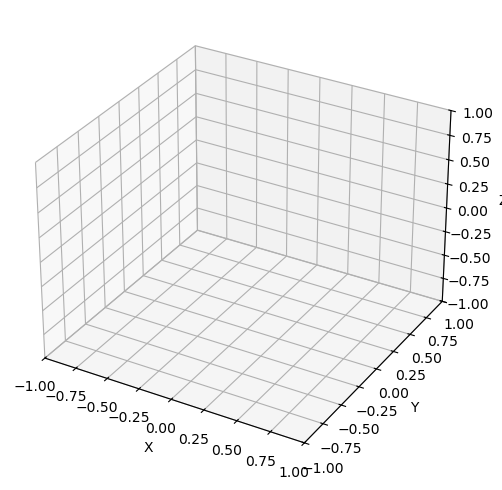

In [12]:
# Cell 1: 准备环境
import pandas as pd
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # noqa: F401
from matplotlib.animation import FuncAnimation
import sys, os

# Cell 2: 读数据 & 转 Rotation 对象
csv_folder = "/data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/202401015-PMC-r2/customEntValHere/2024_11_06/17_13_26"
# "/data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/202401015-PMC-r2/customEntValHere/2024_11_06/16_57_35"
# "/data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/bno_test/customEntValHere/2025_05_09/11_00_52"
# "/data/big_rim/rsync_dcc_sum/Oct3V1mini_sorted/20241001PMCRE2/customEntValHere/2025_02_12/15_36_16"
csv_path = os.path.join(csv_folder,'My_V4_Miniscope/headOrientation.csv')

df = pd.read_csv(csv_path)
quat = df[['qx','qy','qz','qw']].to_numpy()  # SciPy 期望 [x,y,z,w] 顺序
rots = R.from_quat(quat)                     # N 帧的 Rotation 序列
times = df['Time Stamp (ms)'].to_numpy()

# Cell 3: 定义立方体顶点和棱线
# 一个边长为 1，中心在原点的立方体
verts = np.array([
    [-0.5,-0.5,-0.5],
    [ 0.5,-0.5,-0.5],
    [ 0.5, 0.5,-0.5],
    [-0.5, 0.5,-0.5],
    [-0.5,-0.5, 0.5],
    [ 0.5,-0.5, 0.5],
    [ 0.5, 0.5, 0.5],
    [-0.5, 0.5, 0.5],
])
# 按顶点索引画出 12 条棱
edges = [
    (0,1),(1,2),(2,3),(3,0),
    (4,5),(5,6),(6,7),(7,4),
    (0,4),(1,5),(2,6),(3,7),
]

# Cell 4: 初始化 3D 画布
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1,1); ax.set_ylim(-1,1); ax.set_zlim(-1,1)
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
lines = [ax.plot([],[],[], 'k-')[0] for _ in edges]

# Cell 5: 每帧更新函数
# def update_frame(i):
#     Rm = rots[i].as_matrix()  # 3×3
#     pts = verts @ Rm.T        # N×3
#     for line, (u,v) in zip(lines, edges):
#         xs, ys, zs = pts[[u,v],0], pts[[u,v],1], pts[[u,v],2]
#         line.set_data(xs, ys)
#         line.set_3d_properties(zs)
#     ax.set_title(f"t = {times[i]} ms")
#     return lines

# # Cell 6: 生成并显示动画（或保存为 MP4）
# ani = FuncAnimation(fig, update_frame, frames=len(rots),
#                     interval=10, blit=True)
# plt.close(fig)  # 防止 notebook 自动绘原点
# 要在 notebook 里直接看：
# from IPython.display import HTML
# HTML(ani.to_jshtml())

# —— 或者，保存成文件 —— 
# ani.save('bno_test_orientation_anim.mp4', dpi=200, fps=10, writer='ffmpeg')


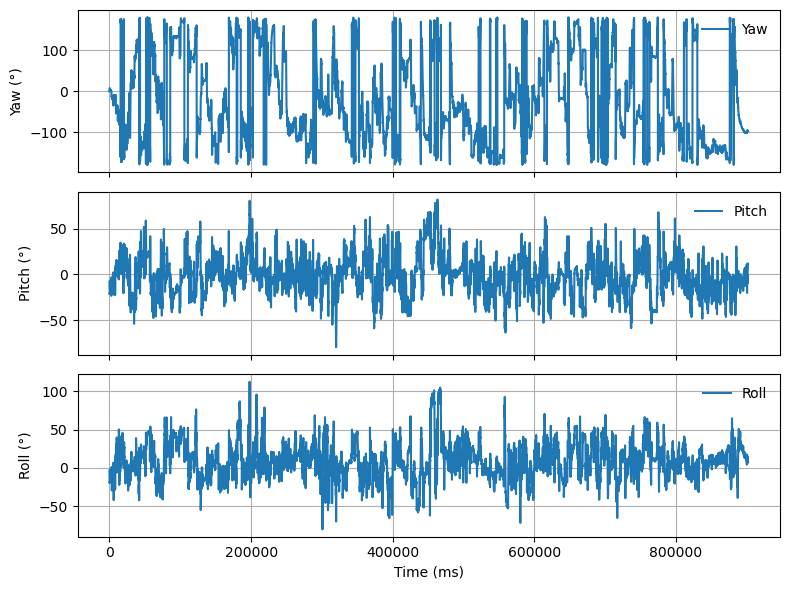

In [13]:
# Cell 7: 计算并绘制 Euler 角
# —————————————————————————————————————————————
# 1. 提取 Euler 角（°），顺序为 [yaw, pitch, roll]
euler_angles = rots.as_euler('zyx', degrees=True)  # shape (N,3)
yaw   = euler_angles[:, 0]
pitch = euler_angles[:, 1]
roll  = euler_angles[:, 2]

# 2. 绘图
fig, axes = plt.subplots(3, 1, figsize=(8, 6), sharex=True)
axes[0].plot(times, yaw,   label='Yaw')   # 绕 Z 轴
axes[1].plot(times, pitch, label='Pitch') # 绕 Y 轴
axes[2].plot(times, roll,  label='Roll')  # 绕 X 轴

# 3. 美化
axes[0].set_ylabel('Yaw (°)')
axes[1].set_ylabel('Pitch (°)')
axes[2].set_ylabel('Roll (°)')
axes[2].set_xlabel('Time (ms)')
for ax in axes:
    ax.grid(True)
    ax.legend(loc='upper right', frameon=False)

plt.tight_layout()
plt.show()


In [14]:
# we should align the data first, lol

# base_path = "/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_17_13"
# # "/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_16_53"
# # "/data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_15_35"
# video_path = os.path.join(base_path, f'videos/Camera{cammm}/0.mp4')
# label3d_path = find_calib_file(base_path)
# pred_folder = 'DANNCE/predict00'
# pred_path = os.path.join(base_path, pred_folder, 'save_data_AVG.mat') #  smoothed_prediction_AVG0.mat


NameError: name 'cammm' is not defined